In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
def record_deets(df, major, minor):
    if 'DocumentDate' in df:
        return df.loc[(df.Major == major) & (df.Minor == minor)].sort_values('DocumentDate')
    return df.loc[(df.Major == major) & (df.Minor == minor)]

In [5]:
def lookup(colvalue):
    return lookupdf.loc[(lookupdf.LUType == colvalue)]

---

## REAL PROPERTY SALES DATASET

In [6]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip

--2020-09-29 19:09:49--  https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129586067 (124M) [application/x-zip-compressed]
Saving to: ‘../../data/raw/Real Property Sales.zip’

Real Property Sales 100%[===================>] 123.58M  4.32MB/s    in 32s     

2020-09-29 19:10:22 (3.86 MB/s) - ‘../../data/raw/Real Property Sales.zip’ saved [129586067/129586067]



In [7]:
! unzip -o ../../data/raw/"Real Property Sales.zip"

Archive:  ../../data/raw/Real Property Sales.zip
  inflating: EXTR_RPSale.csv         


In [9]:
real_prop_sales_df = pd.read_csv('../../data/EXTR_RPSale.csv', encoding='latin-1')

In [10]:
real_prop_sales_df['DocumentDate'] = pd.to_datetime(real_prop_sales_df.DocumentDate)

In [11]:
real_prop_sales_df

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2671216,98400,380,2014-04-02,0,20140602000186,,,,,,,DWORSHAK LYNDEE MARIE,DWORSHAK MICHAEL J,3,6,15,N,N,N,N,11,8,18 31 38
1,2201052,889980,280,2006-03-03,0,20060420001615,,,,,,,MOORE JEFFERY A,HAMPTON JAMES W+VICTORIA A,3,2,15,N,N,N,N,14,3,18 31 51 52
2,2548641,330395,1610,2012-06-07,335000,20120615000867,,,,,,,THORSON CONNIE+TODD,YATTEAU PAUL A+TAMARA J,3,6,3,N,N,N,N,1,8,
3,1598443,675260,940,1998-03-06,209950,199803122092,165,041,675260,P,94,,HART JOHN W II+ANDREA T,HANSON KEVIN P+JENNA M,3,6,3,N,N,N,N,1,8,
4,2339550,795508,170,2008-03-28,0,20080331002272,,,,,,,SCHWEIGER MICHAEL M,SCHWEIGER MICHAEL W,3,6,15,N,N,N,N,18,8,18 31 51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108511,2129741,110200,560,2005-04-11,0,20050610000684,,,,,,,SAVAGE SHIRLEY ANN,SAVAGE BARRY,3,6,15,N,N,N,N,11,8,18 31 38
2108512,2302750,129280,130,2007-07-30,315000,20070803001289,,,,,,,KAUR HARMEET,TOTH OTTO+ERZSEBET,3,2,3,N,N,N,N,1,3,
2108513,1342335,537980,545,1993-11-08,0,199311160374,902,176,537980,U,31,5,BROWN NANCY K+GATH FREDERICK J,GATH NELLIE P,3,0,15,N,N,N,N,9,8,11
2108514,2116711,395610,60,2005-04-19,543000,20050420001846,,,,,,,SHARP KEVAN+MARGARET,THEMIGROUP INC,3,6,3,N,N,N,N,1,8,40


In [26]:
lookup(6) # Sale instrument

,LUType,LUItem,LUDescription
1002,6,1,None
1003,6,10,Real Estate Contract
1004,6,11,Purchaser's Assignment
1005,6,13,Seller's Assignment
1006,6,15,Quit Claim Deed
1007,6,18,Trustees' Deed
1008,6,19,Executor's Deed
1009,6,2,Warranty Deed
1010,6,20,Fiduciary Deed
1011,6,21,Sheriff's Deed


In [27]:
lookup(5) # sale reason

,LUType,LUItem,LUDescription
945,5,1,None
946,5,10,Property Settlement
947,5,11,Divorce Settlement
948,5,12,Tenancy Partition
949,5,13,Community Prop Established
950,5,14,"Partial Int - love,aff,gft"
951,5,15,Easement
952,5,16,Correction (refiling)
953,5,17,Trade
954,5,18,Other


In [26]:
real_prop_sale_less_10000 = real_prop_sales_df.loc[(real_prop_sales_df.SalePrice > 0) & (real_prop_sales_df.SalePrice <= 10000)]

In [27]:
real_prop_sale_less_10000.SaleReason.value_counts()

1     6501
0     4861
18    3643
14     770
8      281
4      278
9      262
5      253
16     132
10     107
15      92
11      60
13      57
17      36
12      31
19      16
6       15
2       14
7        6
Name: SaleReason, dtype: int64

In [28]:
lookup(5)

,LUType,LUItem,LUDescription
945,5,1,None
946,5,10,Property Settlement
947,5,11,Divorce Settlement
948,5,12,Tenancy Partition
949,5,13,Community Prop Established
950,5,14,"Partial Int - love,aff,gft"
951,5,15,Easement
952,5,16,Correction (refiling)
953,5,17,Trade
954,5,18,Other


In [29]:
real_prop_sales_df.SaleReason.value_counts()

1     1242659
18     259732
5       98237
10      85581
8       78032
13      60939
9       55421
14      53378
4       52982
11      41283
16      32629
0       20335
12      12772
17       3396
6        3297
2        3294
19       2738
7        1327
15        367
3         117
Name: SaleReason, dtype: int64

looking up what the 'other' sale reason is

In [30]:
real_prop_sales_df.loc[(real_prop_sales_df.SaleReason == 18)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,2339550,795508,170,2008-03-28,0,20080331002272,,,,,,,SCHWEIGER MICHAEL M,SCHWEIGER MICHAEL W,3,6,15,N,N,N,N,18,8,18 31 51
38,2507895,350160,125,2011-08-24,0,20110831001361,,,,,,,FEDERAL HOME LOAN MORTGAGE CORP,COLE BRIAN E,3,6,22,N,N,N,N,18,8,16 31
45,2897898,766370,622,2017-10-25,479000,20171027001566,,,,,,,SILVEIRA SUSAN-PR,ATKINSON JACOB,3,6,3,N,N,N,N,18,8,12
51,1690899,744950,5,1999-06-10,0,199906111824,012,004,744950,P,1 THRU 4,C,BACKUS L M+BACKUS M F,LAUGHLIN BETTY T+BANK OF AMERICA,3,11,15,N,N,N,N,18,2,31 45
52,1690899,744950,40,1999-06-10,0,199906111824,012,004,744950,P,1 THRU 4,C,BACKUS L M+BACKUS M F,LAUGHLIN BETTY T+BANK OF AMERICA,3,11,15,N,N,N,N,18,2,31 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108437,2451802,92105,9022,2010-06-18,0,20100727000940,,,,,,,VALLEY REGIONAL FIRE AUTHORITY,AUBURN CITY OF,1,11,27,N,N,N,N,18,1,16 31
2108447,2911646,602150,3865,2018-01-10,0,20180122000738,,,,,,,LARSEN RONALDC GENE+CATHERINE,GOLDSMITH JACQUELYNN,3,6,15,N,N,N,N,18,8,18 31 51 52
2108450,1320228,614560,2810,1993-07-14,0,199307210910,018,076,614560,P,3,23,ODEGAARD MARY J,ODEGAARD BIRGER PAUL+MARY J,3,0,15,N,N,N,N,18,8,11
2108453,1863031,305700,140,2002-01-11,0,20020116001266,,,,,,,BELM KENNETH R SR,BEHM RHONDA,3,2,15,N,N,N,N,18,3,31 51 52


In [31]:
lookup(2) #

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [32]:
real_prop_sales_df.PrincipalUse.value_counts()

6     1353719
0      322493
2      309641
11      46466
7       44775
4       12487
10      10078
9        5030
1        1762
3        1156
8         467
5         442
Name: PrincipalUse, dtype: int64

In [33]:
real_prop_sales_df.loc[(real_prop_sales_df.PrincipalUse == 0)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
35,1328849,666902,170,1993-08-18,143000,199309021006,106,040,666902,P,17,,DIAMOND INVESTMENT CORP,ARNTZEN BUNNIE J,3,0,2,N,N,N,N,1,8,
36,1290658,885763,70,1993-01-07,54900,199301251159,025,031,885763,C,UNIT 203,A,RUSTEN RAYMOND+SARA J,HARPER BRANDON R,3,0,2,N,N,N,N,1,3,
61,695296,286790,25,1982-11-09,93000,198211120615,058,054,286790,P,05,,THORNTON TOM F+MINNIE,HAVERS MICHAEL J+KATHLEEN E,3,0,2,N,N,N,,1,8,
63,1330210,332305,9028,1993-09-07,0,199309130703,000,000,000000,,,,WATSON RICKY DONALD,WATSON RICKY DONALD+SHANNON C,3,0,15,N,N,N,N,9,8,11
69,992784,788360,3551,1988-03-25,60000,198803311342,004,087,788360,P,01-03 PT,20,PETERSON GERALD W,BOWMAN JERRY A,3,0,11,N,N,N,N,1,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108471,1245715,332775,80,1992-04-23,0,199205071441,084,039,332775,P,08,,NELSON ERIC B,NELSON SHARON E,3,0,15,N,N,N,N,9,8,11
2108474,878770,23900,512,1986-05-22,113500,198605300001,902,013,023900,U,TR 109 PT,,BLOMBERG CHARLES A+VERIAN L,COLACARRO MICHAEL A+HELEN F,3,0,2,N,N,N,N,1,8,
2108484,1324375,774050,5,1993-08-09,282000,199308111879,044,002,774050,P,1-2,9,CARNEY THOMAS R+ARVILLA N,FEINBERG MICHAEL M+MARGARET,3,0,2,N,N,N,N,1,8,
2108485,920379,381670,45,1986-12-31,46000,198612313696,051,055,381670,P,09,01,PRANGE MARILYN S,SELFRIDGE PATRICK P,1,0,2,N,N,N,N,1,7,


In [34]:
record_deets(real_prop_sales_df, 666902, 170)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
1021659,1258546,666902,170,1992-07-20,0,199207212408,106,040,666902,P,17,,AMERICAN TRUSTEE INC,DIAMOND TRUST CO,3,0,18,N,N,N,N,18,8,13
1949301,1328847,666902,170,1993-07-20,0,199309021005,106,040,666902,P,17,,COYLE THOMAS E,DIAMOND INVESTMENT CORP,3,0,18,N,N,N,N,18,8,32
35,1328849,666902,170,1993-08-18,143000,199309021006,106,040,666902,P,17,,DIAMOND INVESTMENT CORP,ARNTZEN BUNNIE J,3,0,2,N,N,N,N,1,8,
540579,2254414,666902,170,2006-12-05,325000,20061207001888,,,,,,,ARNTZEN BUNNIE J,THORLACIUS WADE+KRISTIE+CLEAVER GREGORY,3,6,3,N,N,N,N,1,8,
1431658,2877570,666902,170,2017-07-12,127398,,,,,,,,CLEAVER GREGORY+THORLACIUS KRISTIE,THORLACIUS WADE,11,6,15,N,N,N,N,18,8,18 51 52
404573,2967702,666902,170,2018-12-19,428000,20181224000541,,,,,,,THORLACIUS WADE,MCVEY CLAYTON P+RIBA NOEL K,11,6,3,N,N,N,N,1,8,


In [35]:
real_prop_sales_df.PropertyType.value_counts()[:10]

3     1549516
1      193880
2      169975
11     103201
0       43717
14      15616
4       10939
10       5143
6        4764
91       3204
Name: PropertyType, dtype: int64

In [36]:
real_prop_sales_df.Major.value_counts()

0         9361
375160    4916
276760    4393
343850    4316
510140    4172
          ... 
311501       1
780407       1
941470       1
808093       1
221630       1
Name: Major, Length: 28751, dtype: int64

In [37]:
real_prop_sales_df.Minor.value_counts()

10      37952
20      37927
30      36722
40      35665
50      33977
        ...  
1426        1
1454        1
3437        1
4758        1
5363        1
Name: Minor, Length: 11281, dtype: int64

In [38]:
real_prop_sales_df.ExciseTaxNbr.value_counts()

2639648    689
2673898    685
866727     678
2003154    274
2003168    267
          ... 
2179426      1
2181475      1
2191716      1
2193765      1
692562       1
Name: ExciseTaxNbr, Length: 1928533, dtype: int64

In [39]:
real_prop_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108516 entries, 0 to 2108515
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ExciseTaxNbr        int64         
 1   Major               object        
 2   Minor               object        
 3   DocumentDate        datetime64[ns]
 4   SalePrice           int64         
 5   RecordingNbr        object        
 6   Volume              object        
 7   Page                object        
 8   PlatNbr             object        
 9   PlatType            object        
 10  PlatLot             object        
 11  PlatBlock           object        
 12  SellerName          object        
 13  BuyerName           object        
 14  PropertyType        int64         
 15  PrincipalUse        int64         
 16  SaleInstrument      int64         
 17  AFForestLand        object        
 18  AFCurrentUseLand    object        
 19  AFNonProfitUse      object        
 20  AF

In [40]:
real_prop_sales_df_extxnbr_2639648 = real_prop_sales_df.loc[(real_prop_sales_df.ExciseTaxNbr == 2639648)]
real_prop_sales_df_extxnbr_2639648

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
165889,2639648,71908,9002,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165890,2639648,71908,9001,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165891,2639648,72009,9001,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165892,2639648,102007,9005,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165893,2639648,102007,9015,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168404,2639648,102007,9008,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
168405,2639648,102007,9019,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
168406,2639648,102007,9016,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
168407,2639648,102007,9012,2013-11-05,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45


In [41]:
real_prop_sales_df_extxnbr_2639648.Major.value_counts()

22007     19
61909     16
142008    16
322008    16
51909     16
          ..
131909     1
232007     1
72009      1
142107     1
162009     1
Name: Major, Length: 98, dtype: int64

---

## RESIDENTIAL BUILDING DATASET

In [9]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip

--2020-09-29 19:11:07--  https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24868715 (24M) [application/x-zip-compressed]
Saving to: ‘../../data/raw/Residential Building.zip’

Residential Buildin 100%[===================>]  23.72M  4.10MB/s    in 5.8s    

2020-09-29 19:11:13 (4.10 MB/s) - ‘../../data/raw/Residential Building.zip’ saved [24868715/24868715]



In [13]:
! unzip -o ../../data/raw/"Residential Building.zip"

Archive:  ../../data/raw/Residential Building.zip
  inflating: EXTR_ResBldg.csv        


In [15]:
res_bld_df = pd.read_csv('../../data/EXTR_ResBldg.csv')

In [42]:
res_bld_df

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,32604,9114,1,1,3520 NE 189TH PL 98155,3520,,NE,189TH,PL,,98155,1.0,7,0,1470,0,0,0,0,0,2250,780,780,6,0,530,Y,0,0,280,5,3,0,N,3,1,1,1,0,1,0,1,1975,0,0,0,0,3,0
1,32606,9012,1,1,23422 NE 188TH ST 98077,23422,,NE,188TH,ST,,98077,2.0,8,0,1340,0,990,0,0,0,2330,0,0,0,0,710,,0,0,0,5,2,0,,3,1,0,2,1,0,0,0,1991,0,0,0,0,3,0
2,32606,9039,1,1,19800 242ND AVE NE 98077,19800,,,242ND,AVE,NE,98077,2.0,9,0,1720,0,780,0,50,0,2450,0,0,0,0,0,,180,0,0,5,3,0,,3,0,0,2,0,0,0,0,2000,0,0,0,0,3,0
3,32606,9044,1,1,18917 244TH AVE NE 98077,18917,,,244TH,AVE,NE,98077,2.0,10,0,1860,0,1830,0,0,0,3690,0,0,0,0,950,,780,0,0,5,3,0,,4,1,0,3,2,0,0,0,2002,0,0,0,0,3,0
4,32606,9045,1,1,18926 240TH AVE NE 98077,18926,,,240TH,AVE,NE,98077,1.0,4,0,740,0,0,0,0,0,740,0,0,0,0,0,,0,0,220,8,7,0,,2,0,0,1,0,0,1,0,1974,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517778,334210,2385,1,1,3315 N PARK AVE 98056,3315,,N,PARK,AVE,,98056,1.0,8,0,1480,0,0,0,0,0,2200,720,720,7,0,0,Y,0,0,0,5,2,0,,4,1,1,1,1,0,0,0,1959,0,0,0,0,5,0
517779,334210,2486,1,1,910 N 33RD PL 98056,910,,N,33RD,PL,,98056,1.0,7,0,1210,0,0,0,0,0,1780,1090,570,7,520,0,Y,60,0,300,5,3,0,,4,0,2,1,1,0,0,0,1979,0,0,0,0,4,0
517780,334210,2520,1,1,907 N 35TH ST,907,,N,35TH,ST,,NaN,2.0,10,0,1510,0,1770,0,0,0,3280,0,0,0,0,500,,100,0,30,7,2,0,,4,0,1,2,3,0,0,1,2006,0,0,0,0,3,0
517781,334210,3208,1,1,1402 N 32ND ST 98056,1402,,N,32ND,ST,,98056,1.0,7,0,1100,0,0,0,0,0,1100,0,0,0,0,580,N,30,0,0,4,3,0,,4,0,0,1,0,0,1,0,1968,0,0,0,0,4,0


In [43]:
res_bld_df.NbrLivingUnits.value_counts()

1     508908
2       7091
3       1766
4         10
10         4
7          2
9          1
8          1
Name: NbrLivingUnits, dtype: int64

In [44]:
res_bld_df.Major.value_counts()

276760    1430
510140    1427
343850    1242
537980    1099
277060     999
          ... 
284070       1
92409        1
171780       1
339540       1
885799       1
Name: Major, Length: 11619, dtype: int64

---

## PARCEL DATASET

In [12]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip

--2020-09-29 19:11:25--  https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31115221 (30M) [application/x-zip-compressed]
Saving to: ‘../../data/raw/Parcel.zip’

Parcel.zip          100%[===================>]  29.67M  4.67MB/s    in 6.7s    

2020-09-29 19:11:32 (4.41 MB/s) - ‘../../data/raw/Parcel.zip’ saved [31115221/31115221]



In [19]:
! unzip -o ../../data/raw/"Parcel.zip"

Archive:  ../../data/raw/Parcel.zip
  inflating: EXTR_Parcel.csv         


In [20]:
parceldf = pd.read_csv('../../data/EXTR_Parcel.csv', encoding='latin-1')

In [45]:
parceldf

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,785662,370,Single Family Residence,SOMERSET HIGHLANDS NO. 03,37,1,5,24,15,SE,R,31.0,8.0,NaN,NaN,BELLEVUE,330,R-3.5,1,1,2,10300,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,990600,25,,ZWICKS 1ST ADD,5,1 &,3,25,13,NE,R,42.0,11.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,5000,2,2,4,0,1,0,2,0,False,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,286210,320,,GRAHAMS A B UNIVERSITY ADD,16,3,4,25,8,SE,R,44.0,6.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,4280,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,264800,225,duplex,FRENCHS ADD TO SLAUGHTER,6 THRU 9,2,5,21,18,NE,R,28.0,11.0,NaN,NaN,AUBURN,133,R10,6,1,3,12100,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,1,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,689181,90,,PRESTIGE HEIGHTS DIV NO 02,9,,4,26,2,SE,R,4.0,4.0,NaN,NaN,KENMORE,1442,R6,1,1,2,11554,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616105,940700,1210,,WILDERNESS RIM DIV NO. 01,121,,8,23,27,SW,R,80.0,7.0,NaN,NaN,KING COUNTY,6675,RA2.5,1,1,2,9750,2,1,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,Y,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616106,113730,210,,BROOK TRAILS ESTATES,21,,6,26,18,SW,R,72.0,4.0,NaN,NaN,KING COUNTY,7570,RA5,1,1,2,29930,2,1,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y
616107,132405,9117,,NaN,,,5,24,13,NW,R,65.0,1.0,NaN,NaN,BELLEVUE,389,R-3.5,1,1,2,20240,2,2,4,0,1,0,0,0,False,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616108,171190,142,,COLUMBIA VIEW TRACTS,1,5,4,24,21,NE,R,21.0,4.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,300,3330,2,2,2,1,4,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [46]:
lookup(54)

,LUType,LUItem,LUDescription
981,54,1,UPLANDS ONLY
982,54,2,UPLANDS WITH TIDELANDS/SHORELANDS
983,54,3,TIDELANDS/SHORELANDS ONLY


In [47]:
lookup(53)

,LUType,LUItem,LUDescription
978,53,1,To Residence
979,53,2,To Waterfront
980,53,3,No Waterfront Access


In [48]:
lookup(104)

,LUType,LUItem,LUDescription
234,104,1,PRESENT USE
235,104,2,INTERIM USE
236,104,3,TEAR DOWN
237,104,4,OTHER


In [49]:
lookup(103)

,LUType,LUItem,LUDescription
213,103,1,SINGLE FAMILY
214,103,10,AMUSEMENT/ENTERTAINMENT
215,103,11,CULTURAL
216,103,12,EDUCATIONAL SERVICE
217,103,13,COMMERCIAL SERVICE
218,103,14,RETAIL/WHOLESALE
219,103,15,MANUFACTURING
220,103,16,AGRICULTURAL
221,103,17,FORESTRY
222,103,18,FISH & WILDLIFE MGMT


In [50]:
lookup(102) # present use on parcel

,LUType,LUItem,LUDescription
84,102,0,
85,102,10,Congregate Housing
86,102,101,Retail Store
87,102,104,Retail(Big Box)
88,102,105,Retail(Discount)
...,...,...,...
208,102,64,Shopping Ctr(Specialty)
209,102,7,Houseboat
210,102,8,Mobile Home
211,102,9,Single Family(C/I Use)


# ---

Checking for duplex and single family residence:

In [51]:
parceldf.PropName.value_counts()

                                    528645
Single Family Residence               9070
Single Family Residence               1686
VACANT LAND                           1606
Townhouse                             1540
                                     ...  
Life of Victory Church                   1
GAS DEPOT/PLANET VAPES                   1
Margaret                                 1
4-PLEX - BEEKEN  (2 OF 2)                1
WILLOWS BUSINESS CENTER BLDG #10         1
Name: PropName, Length: 35237, dtype: int64

In [52]:
parcel_duplex = parceldf.loc[(parceldf.PropName == 'duplex')]

In [53]:
parcel_duplex.PropType.value_counts()

R    269
C      1
Name: PropType, dtype: int64

In [54]:
parcel_duplex

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
4406,663230,644,duplex,PARAMOUNT PARK ADD,4,12,4,26,20,NE,R,7.0,6.0,NaN,NaN,SEATTLE,25,MR (M),6,2,3,6000,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,3,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
7910,145360,1621,duplex,CEDAR PARK,7,6,4,26,21,SE,R,8.0,1.0,NaN,NaN,SEATTLE,10,LR2 (M),6,2,3,6000,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,2,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
8600,277060,3525,duplex,GILMANS ADD BLKS 01 THRU 87,20-21,26,3,25,13,SW,R,12.0,2.0,NaN,NaN,SEATTLE,10,LR3 RC (M),1,1,29,1250,2,2,4,0,1,0,0,0,False,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
13015,269410,120,duplex,GARDEN BROOK DIV NO. 02,12,,5,24,15,NW,R,31.0,7.0,NaN,NaN,BELLEVUE,330,R-10,6,1,3,11178,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,1,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
14180,12505,9179,duplex,NaN,,,5,25,1,SE,R,72.0,6.0,NaN,NaN,REDMOND,2025,R12,6,1,3,7200,2,2,3,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606379,270060,180,duplex,GARDINERS ADD TO NORTH BEND,18-19-20,2,8,23,9,NE,R,80.0,3.0,NaN,NaN,NORTH BEND,1925,DC,6,2,3,10490,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
610056,99300,260,duplex,BOULEVARD PLACE ADD,4-5,5,4,26,31,SE,R,6.0,7.0,NaN,NaN,SEATTLE,10,LR2 (M),6,2,3,5125,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,Y,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
610489,431070,1455,duplex,LICTON SPRINGS PARK ADD,5-6,8,4,26,31,NE,R,6.0,7.0,NaN,NaN,SEATTLE,10,LR3 (M),6,2,3,5000,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
615926,337510,180,duplex,HILLSIDE EAST,18,,5,25,1,SE,R,72.0,6.0,NaN,NaN,REDMOND,2025,R12,6,1,3,9200,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [55]:
record_deets(res_bld_df, 270060, 180)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
376630,270060,180,1,2,332 E 2ND ST 98045,332,,E,2ND,ST,,98045,1.0,6,0,2090,0,0,0,0,0,2090,0,0,0,0,260,N,340,0,120,1,1,0,N,5,1,1,2,0,0,0,0,1943,1959,0,0,0,3,0


# ---

In [56]:
parceldf.PropType.value_counts()

R    564657
C     44802
K      3672
T      1988
M       793
U       122
X        76
Name: PropType, dtype: int64

let's look at C, commercial.

ignore U and X for now, since they are so few.

In [57]:
parceldf.loc[(parceldf.PropType == 'R')]

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,785662,370,Single Family Residence,SOMERSET HIGHLANDS NO. 03,37,1,5,24,15,SE,R,31.0,8.0,NaN,NaN,BELLEVUE,330,R-3.5,1,1,2,10300,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,990600,25,,ZWICKS 1ST ADD,5,1 &,3,25,13,NE,R,42.0,11.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,5000,2,2,4,0,1,0,2,0,False,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,286210,320,,GRAHAMS A B UNIVERSITY ADD,16,3,4,25,8,SE,R,44.0,6.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,4280,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,264800,225,duplex,FRENCHS ADD TO SLAUGHTER,6 THRU 9,2,5,21,18,NE,R,28.0,11.0,NaN,NaN,AUBURN,133,R10,6,1,3,12100,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,1,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,689181,90,,PRESTIGE HEIGHTS DIV NO 02,9,,4,26,2,SE,R,4.0,4.0,NaN,NaN,KENMORE,1442,R6,1,1,2,11554,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616105,940700,1210,,WILDERNESS RIM DIV NO. 01,121,,8,23,27,SW,R,80.0,7.0,NaN,NaN,KING COUNTY,6675,RA2.5,1,1,2,9750,2,1,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,Y,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616106,113730,210,,BROOK TRAILS ESTATES,21,,6,26,18,SW,R,72.0,4.0,NaN,NaN,KING COUNTY,7570,RA5,1,1,2,29930,2,1,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y
616107,132405,9117,,NaN,,,5,24,13,NW,R,65.0,1.0,NaN,NaN,BELLEVUE,389,R-3.5,1,1,2,20240,2,2,4,0,1,0,0,0,False,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616108,171190,142,,COLUMBIA VIEW TRACTS,1,5,4,24,21,NE,R,21.0,4.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,300,3330,2,2,2,1,4,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [58]:
parceldf.loc[(parceldf.PropType == 'C')]

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
46,65600,550,MODA APTS,BELL AND DENNYS 2ND ADD,2 THRU 5,36,4,25,31,NW,C,30.0,90.0,100.0,10.0,SEATTLE,11,DMR/R 145/65,21,1,16,25440,2,2,4,0,1,0,2,0,False,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
53,112106,9050,VACANT LAND,NaN,,,6,21,11,SE,C,60.0,60.0,NaN,NaN,BLACK DIAMOND,905,CC,13,0,309,157251,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
55,95200,5770,WEST SEATTLE CHRISTIAN SCHOOL,BOSTON COMPANYS PLAT OF W S,1 THRU 11,45,3,24,14,SE,C,45.0,25.0,NaN,NaN,SEATTLE,10,LR2 (M),6,1,165,31625,2,2,4,1,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
59,927570,3430,14 UNIT APT,WEST SEATTLE L&I CO 3RD PLAT REPLAT,8 THRU 11,93,3,24,11,SE,C,45.0,10.0,100.0,235.0,SEATTLE,10,LR2 RC (M),6,1,11,8546,2,2,4,0,1,0,2,0,False,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,2,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
152,182504,9072,"STONE34 - BROOKS HQ - OTHER PARCELS 9132, 9075, 9088",NaN,,,4,25,18,SE,C,17.0,10.0,280.0,300.0,SEATTLE,10,IC-65 (M),13,1,106,17424,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616042,292613,9032,Vacant Lot (Sand Storage),NaN,,,13,26,29,SE,C,95.0,60.0,NaN,NaN,KING COUNTY,6076,F,20,0,316,11761,0,0,4,0,0,1,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616054,202104,9174,WAREHOUSE,NaN,,,4,21,20,SE,C,55.0,30.0,NaN,NaN,FEDERAL WAY,1205,CE,13,1,195,132422,2,2,4,0,2,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616084,410450,275,LEGACY CROWN POINTE BLDG B,LAKE WASHINGTON BLVD BEACH,55 &,&,5,25,17,SW,C,85.0,70.0,280.0,200.0,KIRKLAND,1701,PR 8.5,13,1,106,71190,2,2,4,0,1,1,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616091,52203,9018,LS Cedar Inc,NaN,,,3,22,5,NW,C,47.0,30.0,NaN,NaN,KING COUNTY,4055,R1SO,1,2,195,188179,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


Looking up major 65600 and minor 550 across all dataframes

In [59]:
record_deets(real_prop_sales_df, 65600, 550)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
140178,1433543,65600,550,1995-06-15,0,199506190959,001,077,065600,P,2 THRU 5,36,IRBY JAMES S,WEST COAST PAPER PROFIT SHARING TRUST C/O DAVID A,3,0,19,N,N,N,N,4,8,23 32
1775100,1463453,65600,550,1995-12-28,1450000,199512290539,001,077,065600,P,2 THRU 5,36,WEST COAST PAPER PROFIT SHARING TR,KOH CHRISTOPHER J ET AL,3,11,3,N,N,N,N,5,2,
280007,1472838,65600,550,1996-02-23,0,199603051111,001,077,065600,P,02-05,36,KOH CHRISTOPHER J,KOH JAMES & MARIA,3,11,15,N,N,N,,14,2,32 51 52
104090,1720148,65600,550,1999-11-03,0,19991104001357,,,,,,,C D TRUST,3RD & BATTERY LLC,3,11,3,N,N,N,N,5,2,11 31
1333610,2232016,65600,550,2006-08-22,8725000,20060825001221,,,,,,,3RD & BATTERY LLC,2312 LLC,3,11,3,N,N,N,N,1,2,57
1549541,2313984,65600,550,2007-09-25,0,20071003001614,,,,,,,2312 LLC,SEATTLE CITY OF,1,11,27,N,N,N,N,18,1,16 31
1995467,2496100,65600,550,2011-06-15,49424700,20110615001679,,,,,,,2312 LLC,EQR-MODA I LLC+EQR-MODA II LLC,3,7,4,N,N,N,N,1,2,


In [60]:
record_deets(res_bld_df, 65600, 550)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost


---

## LOOKUP TABLE

In [15]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip

--2020-09-29 19:11:49--  https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16120 (16K) [application/x-zip-compressed]
Saving to: ‘../../data/raw/Lookup.zip’

Lookup.zip          100%[===================>]  15.74K  --.-KB/s    in 0s      

2020-09-29 19:11:49 (62.2 MB/s) - ‘../../data/raw/Lookup.zip’ saved [16120/16120]



In [23]:
! unzip -o ../../data/raw/"Lookup.zip"

Archive:  ../../data/raw/Lookup.zip
  inflating: EXTR_LookUp.csv         


In [24]:
lookupdf = pd.read_csv('../../data/EXTR_LookUp.csv')

In [60]:
lookupdf

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY
1,1,10,Land with new building
2,1,11,"Household, single family units"
3,1,12,"Multiple family residence (Residential, 2-4 units)"
4,1,13,"Multiple family residence (Residential, 5+ units)"
...,...,...,...
1203,99,1,SUBSTANDARD
1204,99,2,BELOW AVERAGE
1205,99,3,AVERAGE
1206,99,4,ABOVE AVERAGE


---

# MERGING TABLES

In [61]:
rps_parcel_dfmerge = pd.merge(real_prop_sales_df, parceldf,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])

In [62]:
rps_parcel_resbld_dfmerge = pd.merge(rps_parcel_dfmerge, res_bld_df, how='left', left_on=['Major', 'Minor'], right_on=['Major','Minor'])

In [63]:
all_merge = rps_parcel_resbld_dfmerge[['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFHistoricProperty',
 'SaleReason',
 'PropName',
 'PropType',
 'PresentUse',
 'SqFtLot',
 'WfntLocation',
 'TrafficNoise',
 'AirportNoise',
 'PowerLines',
 'OtherNuisances',
 'NbrLivingUnits',
 'ZipCode',
 'SqFt1stFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'Bedrooms',
 'BathHalfCount',
 'BathFullCount']]

In [64]:
all_sales_merged = all_merge[(all_merge.SalePrice > 0) & (all_merge.DocumentDate > '2019') & (all_merge.DocumentDate < '2020')].sort_values("DocumentDate")
all_sales_merged


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
866177,2970149,413210,180,2019-01-02,749000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
11186,2974525,287710,3940,2019-01-02,1100000,3,7,3,N,1,PHINNEY RIDGE PROFESSIONAL CENTER,C,9.0,3413.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0
962198,3029568,236300,0520,2019-12-31,580000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701743,3028369,388380,51,2019-12-31,669000,2,6,3,N,1,,R,2.0,9041.0,0.0,0.0,0.0,N,N,1.0,NaN,1450.0,0.0,0.0,0.0,2380.0,1440.0,930.0,510.0,0.0,40.0,0.0,100.0,5.0,0.0,3.0


In [65]:
all_totliving_sqft = all_sales_merged.dropna(subset=['SqFtTotLiving'])

In [66]:
all_totliving_sqft

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,80.0,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


---

## EXPLORATORY DATA ANALYSIS

In [67]:
print(f'real property sales records: {len(real_prop_sales_df)}')
print(f'real property sales records with sales greater than 0: {len(real_prop_sales_df[(real_prop_sales_df.SalePrice > 0)])}')
print(f'residential buidling records: {len(res_bld_df)}')
print(f'parcel records: {len(parceldf)}')

real property sales records: 2108516
real property sales records with sales greater than 0: 1380291
residential buidling records: 517783
parcel records: 616110


# ---

#### PROPERTY TYPE (RPS) AND PROP TYPE (PARCEL) COUNTS

In [68]:
all_sales_merged.PropertyType.value_counts()

11    17486
3     16587
2      2255
14     1966
1      1364
10     1207
91      332
0       246
4       168
12      149
13      119
59      119
5        67
99       26
6        22
18       18
65        9
53        9
58        7
94        6
83        6
50        6
55        5
16        4
96        4
19        3
88        3
68        2
39        2
63        2
15        2
48        2
51        2
52        2
54        2
46        2
74        1
45        1
69        1
21        1
23        1
27        1
61        1
64        1
Name: PropertyType, dtype: int64

In [69]:
lookup(1) # Property type, rps

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY
1,1,10,Land with new building
2,1,11,"Household, single family units"
3,1,12,"Multiple family residence (Residential, 2-4 units)"
4,1,13,"Multiple family residence (Residential, 5+ units)"
...,...,...,...
79,1,93,Water areas
80,1,94,Open space land classified under chapter 84.34 RCW
81,1,95,Timberland classified under chapter 84.34 RCW
82,1,96,Improvements on leased land


In [70]:
all_sales_merged.PropType.value_counts(normalize=True)

R    0.940214
C    0.058790
T    0.000513
K    0.000392
U    0.000091
Name: PropType, dtype: float64

#### COMMERICAL PROP TYPE (PARCEL): to check how much of these properties are apartments

In [71]:
all_commercial = all_sales_merged[(all_sales_merged.PropType == 'C')]
all_commercial

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
11186,2974525,287710,3940,2019-01-02,1100000,3,7,3,N,1,PHINNEY RIDGE PROFESSIONAL CENTER,C,9.0,3413.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681787,2969651,276770,990,2019-01-02,5073800,59,7,3,N,1,Ballard Court Apartment,C,16.0,4750.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039323,2969451,192105,9028,2019-01-02,355000,91,7,3,N,1,VACANT LAND,C,309.0,37700.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182238,2968845,202304,9538,2019-01-02,170000,91,7,3,N,1,Vacant Land,C,301.0,13715.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165337,2968744,102406,9111,2019-01-02,4579520,59,7,3,N,1,Pine Lake Plaza I,C,96.0,30501.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443794,3027845,383000,63,2019-12-30,7125000,3,11,3,N,1,ADVANCED LADDERS/FIRESIDE HOME SOLUTIONS,C,195.0,58349.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835805,3027844,195970,15,2019-12-30,8100000,3,7,22,N,1,retail,C,96.0,10776.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835804,3027844,202504,9164,2019-12-30,8100000,3,7,22,N,1,VACANT LAND,C,159.0,7146.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444003,3027845,383000,64,2019-12-30,7125000,3,11,3,N,1,VACANT INDUSTRIAL BUILDING,C,195.0,80586.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
all_commercial.PrincipalUse.value_counts(normalize=True)

7     0.905544
11    0.048768
4     0.021561
6     0.016940
3     0.005133
2     0.001540
5     0.000513
Name: PrincipalUse, dtype: float64

In [73]:
lookup(2) # Principal use rps

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


#### KEEPING ONLY RESIDENTIAL (PROP TYPE FROM PARCEL): 
#### dropping commercial props bc apts (4+ units) make up 7% of total comm props, which make up 5% of our total sales data.

In [74]:
all_residential = all_sales_merged[(all_sales_merged.PropType == 'R')]
all_residential

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,80.0,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [75]:
all_residential[all_residential.SqFtTotLiving == 0]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount


# ---

#### INVESTIGATING PRINCIPAL USE (rps)

In [76]:
all_residential.PrincipalUse.value_counts(normalize=True)

6     0.996726
7     0.002600
10    0.000321
2     0.000128
0     0.000096
3     0.000064
9     0.000032
8     0.000032
Name: PrincipalUse, dtype: float64

In [77]:
lookup(2) # Principal use

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [78]:
all_residential[(all_residential.PrincipalUse == 0) & (all_residential.Bedrooms == 0)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount


In [79]:
all_residential.PropertyType.value_counts(normalize=True)[:10]

11    0.537973
3     0.308211
2     0.053091
10    0.036271
1     0.033415
91    0.009597
0     0.006773
4     0.005072
12    0.003402
14    0.002632
Name: PropertyType, dtype: float64

In [80]:
all_residential.SqFtTotLiving.isna().sum()

1932

# ---

#### INVESTIGATING PRESENT USE (parcel)

In [81]:
lookup(102) # present use, parcel

,LUType,LUItem,LUDescription
84,102,0,
85,102,10,Congregate Housing
86,102,101,Retail Store
87,102,104,Retail(Big Box)
88,102,105,Retail(Discount)
...,...,...,...
208,102,64,Shopping Ctr(Specialty)
209,102,7,Houseboat
210,102,8,Mobile Home
211,102,9,Single Family(C/I Use)


In [82]:
all_residential.PresentUse.value_counts()

2.0      25635
29.0      2832
300.0     1668
8.0        340
3.0        274
6.0        233
4.0         82
301.0       43
0.0         16
57.0        13
266.0        3
309.0        3
11.0         2
332.0        2
150.0        1
143.0        1
272.0        1
330.0        1
261.0        1
341.0        1
5.0          1
9.0          1
Name: PresentUse, dtype: int64

# ---

#### Property type filter

In [83]:
all_residential.PropertyType.value_counts(normalize=True)[:10]

11    0.537973
3     0.308211
2     0.053091
10    0.036271
1     0.033415
91    0.009597
0     0.006773
4     0.005072
12    0.003402
14    0.002632
Name: PropertyType, dtype: float64

In [84]:
lookup(1) # Property type

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY
1,1,10,Land with new building
2,1,11,"Household, single family units"
3,1,12,"Multiple family residence (Residential, 2-4 units)"
4,1,13,"Multiple family residence (Residential, 5+ units)"
...,...,...,...
79,1,93,Water areas
80,1,94,Open space land classified under chapter 84.34 RCW
81,1,95,Timberland classified under chapter 84.34 RCW
82,1,96,Improvements on leased land


#### Investigating property type (rps) #1 = land only

In [85]:
all_residential[(all_residential.PropertyType == 1)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
653247,2969887,701070,851,2019-01-03,450000,1,6,22,N,1,,R,2.0,4000.0,0.0,0.0,0.0,N,N,1.0,NaN,1290.0,1230.0,0.0,0.0,3330.0,1150.0,810.0,340.0,0.0,270.0,0.0,860.0,4.0,1.0,3.0
738799,2969111,22406,9129,2019-01-03,7410000,1,6,3,N,18,,R,300.0,54315.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738798,2969111,22406,9063,2019-01-03,7410000,1,6,3,N,18,,R,300.0,169671.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738797,2969111,22406,9134,2019-01-03,7410000,1,6,3,N,18,,R,300.0,108900.0,0.0,0.0,0.0,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70409,2971131,102107,9021,2019-01-10,9000,1,6,15,N,8,VACANT,R,300.0,59677.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124374,3027774,152205,9085,2019-12-28,8750,1,6,15,N,18,,R,300.0,218235.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396252,3027775,152205,9088,2019-12-28,8750,1,6,15,N,18,,R,300.0,212572.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163942,3028280,857600,810,2019-12-31,8555000,1,6,3,N,1,NaN,R,300.0,135997.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163943,3028280,857600,800,2019-12-31,8555000,1,6,3,N,1,NaN,R,300.0,108287.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
lookup(2)

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [87]:
lookup(50)

,LUType,LUItem,LUDescription
964,50,1,DUWAMISH
965,50,2,ELLIOTT BAY
966,50,3,PUGET SOUND
967,50,4,LAKE UNION
968,50,5,SHIP CANAL
969,50,6,LAKE WASH
970,50,7,LAKE SAMM
971,50,8,OTHER LAKE
972,50,9,RIVER/SLOUGH


In [88]:
lookup(5) #real_prop_sales_df, sale reason

,LUType,LUItem,LUDescription
945,5,1,None
946,5,10,Property Settlement
947,5,11,Divorce Settlement
948,5,12,Tenancy Partition
949,5,13,Community Prop Established
950,5,14,"Partial Int - love,aff,gft"
951,5,15,Easement
952,5,16,Correction (refiling)
953,5,17,Trade
954,5,18,Other


In [89]:
lookup(7) #real_prop_sales_df, sale warning

,LUType,LUItem,LUDescription
1056,7,1,PERSONAL PROPERTY INCLUDED
1057,7,10,TEAR DOWN
1058,7,11,CORPORATE AFFILIATES
1059,7,12,"ESTATE ADMINISTRATOR, GUARDIAN, OR EXECUTOR"
1060,7,13,BANKRUPTCY - RECEIVER OR TRUSTEE
...,...,...,...
1123,7,70,BUILDING ONLY
1124,7,71,PARKING EASEMENT
1125,7,72,PARKING STALLS
1126,7,8,QUESTIONABLE PER APPRAISAL


In [90]:
record_deets(real_prop_sales_df, 98400, 380)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
1590634,1365300,98400,380,1994-03-23,139950,199403281030,080,089,098400,P,38,,WIXOM JACK L+GRACE E,DWORSHAK MICHAEL J,3,0,2,N,N,N,N,1,8,
1866954,2664537,98400,380,2014-04-01,0,20140428000126,,,,,,,DWORSHAK MICHAEL,DWORSHAK LYNDEE,3,6,15,N,N,N,N,11,8,18 31 38
0,2671216,98400,380,2014-04-02,0,20140602000186,,,,,,,DWORSHAK LYNDEE MARIE,DWORSHAK MICHAEL J,3,6,15,N,N,N,N,11,8,18 31 38
1786451,2856017,98400,380,2017-03-29,439500,20170330001397,,,,,,,DWORSHAK MICHAEL J,BERGSTROM AGATA,11,6,3,,,,,1,8,


In [91]:
record_deets(res_bld_df, 98400, 380)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
24729,98400,380,1,1,12713 SE 188TH PL 98058,12713,,SE,188TH,PL,,98058,1.0,7,0,1300,0,0,0,0,0,2050,1250,750,6,500,0,Y,0,0,260,5,2,0,N,4,1,1,1,0,1,0,1,1967,0,0,0,0,4,0


In [92]:
record_deets(parceldf, 98400, 380)

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
281375,98400,380,,BOULEVARD LANE DIV NO. 01,38,,5,23,33,SE,R,51.0,6.0,NaN,NaN,KING COUNTY,5103,R6,1,1,2,8643,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


---

# FSM

In [93]:
all_residential.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'PropertyType', 'PrincipalUse', 'SaleInstrument', 'AFHistoricProperty',
       'SaleReason', 'PropName', 'PropType', 'PresentUse', 'SqFtLot',
       'WfntLocation', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrLivingUnits', 'ZipCode', 'SqFt1stFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageBasement',
       'SqFtGarageAttached', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'Bedrooms', 'BathHalfCount', 'BathFullCount'],
      dtype='object')

In [94]:
all_residential

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,80.0,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [95]:
f = 'SalePrice~SqFtTotLiving'
model = ols(formula=f, data=all_totliving_sqft)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3914.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:12:21   Log-Likelihood:            -4.4385e+05
No. Observations:               29222   AIC:                         8.877e+05
Df Residuals:                   29220   BIC:                         8.877e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.973e+04   1.35e+04      5.164      0.000    4.33e+04    9.62e+04
SqFtTotLiving   351.1930      5.614     62.560      0.000     340.190     362.196
==============================================================================
Omnibus:                    63826.461   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        759112243.465
Skew:                          19.553   Prob(JB):                         0.00
Kurtosis:                     791.625   Cond. No.                     5.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
all_totliving_sqft

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,80.0,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [97]:
import numpy as np

In [98]:
OpenPorch = all_totliving_sqft['SqFtOpenPorch'].astype(bool).astype(int)
OpenPorch

2055930    1
1648073    0
1647464    1
1493478    0
396956     0
          ..
775739     0
775738     1
906528     1
2061020    1
701743     1
Name: SqFtOpenPorch, Length: 29222, dtype: int64

In [103]:
EnlosedPorch = all_totliving_sqft['SqFtEnclosedPorch'].astype(bool).astype(int)
EnlosedPorch

2055930    0
1648073    1
1647464    0
1493478    0
396956     0
          ..
775739     0
775738     1
906528     0
2061020    0
701743     0
Name: SqFtEnclosedPorch, Length: 29222, dtype: int64

In [110]:
WaterView = all_totliving_sqft['WfntLocation'].astype(bool).astype(float)
WaterView

2055930    0.0
1648073    0.0
1647464    0.0
1493478    0.0
396956     0.0
          ... 
775739     1.0
775738     1.0
906528     0.0
2061020    0.0
701743     0.0
Name: WfntLocation, Length: 29222, dtype: float64

In [99]:
all_totliving_sqft.insert(loc=31, column='Porch', value=OpenPorch)

In [106]:
all_totliving_sqft.insert(loc=33, column='EnlosedPorch', value=EnlosedPorch)

In [118]:
all_totliving_sqft.insert(loc=15, column='WaterFronVew', value=WaterView)
all_totliving_sqft

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,WaterFronVew,TrafficNoise,WaterView,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,Porch,SqFtEnclosedPorch,EnlosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,1,0.0,0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,0,100.0,1,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,1,0.0,0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0,0.0,0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0,0.0,0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,1.0,0.0,1.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,1.0,0.0,1.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,1,80.0,1,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,1,0.0,0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,1,0.0,0,0.0,3.0,1.0,2.0


In [101]:
#Porch_inc = all_totliving_sqft[all_totliving_sqft['SqFtOpenPorch'] !=0]['SalePrice']
#Porch_inc = np.array(Porch_inc, int)
#Porch_inc

In [102]:
#Porch_dec = all_totliving_sqft[all_totliving_sqft['SqFtOpenPorch'] ==0] ['SalePrice']
#Porch_dec = np.array(Porch_dec, int)
#Porch_dec

In [149]:
from scipy import stats

In [105]:
lookup(50)

,LUType,LUItem,LUDescription
964,50,1,DUWAMISH
965,50,2,ELLIOTT BAY
966,50,3,PUGET SOUND
967,50,4,LAKE UNION
968,50,5,SHIP CANAL
969,50,6,LAKE WASH
970,50,7,LAKE SAMM
971,50,8,OTHER LAKE
972,50,9,RIVER/SLOUGH


In [122]:
all_totliving_sqft

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,WaterFronVew,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,Porch,SqFtEnclosedPorch,EnlosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,1,0.0,0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,0,100.0,1,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,1,0.0,0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0,0.0,0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0,0.0,0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,1.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,1.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,1,80.0,1,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,1,0.0,0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,1,0.0,0,0.0,3.0,1.0,2.0


(array([510.,  53.,  11.,   1.,   4.,   0.,   0.,   1.,   0.,   1.]),
 array([1.0000000e+01, 3.7500090e+06, 7.5000080e+06, 1.1250007e+07,
        1.5000006e+07, 1.8750005e+07, 2.2500004e+07, 2.6250003e+07,
        3.0000002e+07, 3.3750001e+07, 3.7500000e+07]),
 <a list of 10 Patch objects>)

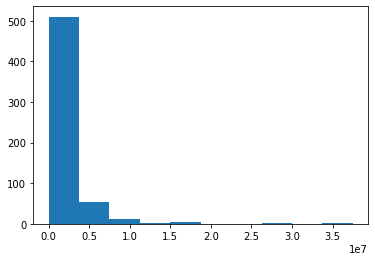

In [179]:
plt.hist(all_totliving_sqft[all_totliving_sqft['WaterFronVew']==1]['SalePrice'])

(array([2.8548e+04, 2.4000e+01, 6.7000e+01, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000000e+00, 6.25000450e+06, 1.25000040e+07, 1.87500035e+07,
        2.50000030e+07, 3.12500025e+07, 3.75000020e+07, 4.37500015e+07,
        5.00000010e+07, 5.62500005e+07, 6.25000000e+07]),
 <a list of 10 Patch objects>)

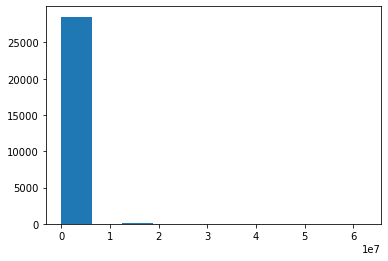

In [181]:
plt.hist(all_totliving_sqft[all_totliving_sqft['WaterFronVew']==0]['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd64c2b700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd64c2bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd64c2b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd64c364f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd64c367f0>],
 'means': []}

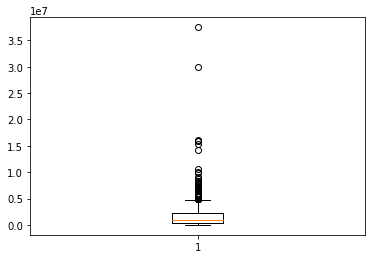

In [180]:
plt.boxplot(all_totliving_sqft[all_totliving_sqft['WaterFronVew']==1]['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd6529b070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd6529b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd6528dcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd6529bdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd652a7130>],
 'means': []}

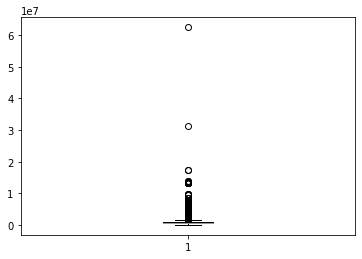

In [182]:
plt.boxplot(all_totliving_sqft[all_totliving_sqft['WaterFronVew']==0]['SalePrice'])

In [189]:
all_totliving_sqft


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,WaterFronVew,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,Porch,SqFtEnclosedPorch,EnlosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,1,0.0,0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,0,100.0,1,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,1,0.0,0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0,0.0,0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0,0.0,0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,1.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,1.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,1,80.0,1,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,1,0.0,0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,1,0.0,0,0.0,3.0,1.0,2.0


In [123]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [141]:
all_totliving_sqft['SalePrice'].describe()

count    2.922200e+04
mean     8.387855e+05
std      1.017332e+06
min      5.000000e+00
25%      4.670000e+05
50%      6.575000e+05
75%      9.200000e+05
max      6.250000e+07
Name: SalePrice, dtype: float64

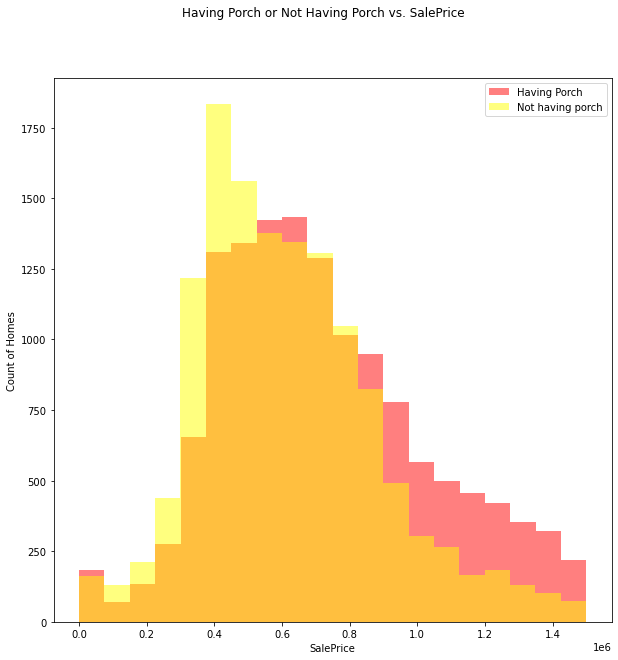

In [208]:
# we can change the sale price to get different result. 
fig, ax = plt.subplots(figsize = (10, 10))

ax.hist(all_totliving_sqft[(all_totliving_sqft["Porch"]==1)&(all_totliving_sqft['SalePrice']<1500000)]["SalePrice"], bins=20, alpha=0.5, color="red", label="Having Porch")
ax.hist(all_totliving_sqft[(all_totliving_sqft["Porch"]==0)&(all_totliving_sqft['SalePrice']<1500000)]["SalePrice"], bins=20, alpha=0.5, color="yellow", label="Not having porch")

ax.set_xlabel("SalePrice")
ax.set_ylabel("Count of Homes")

fig.suptitle("Having Porch or Not Having Porch vs. SalePrice")

ax.legend();

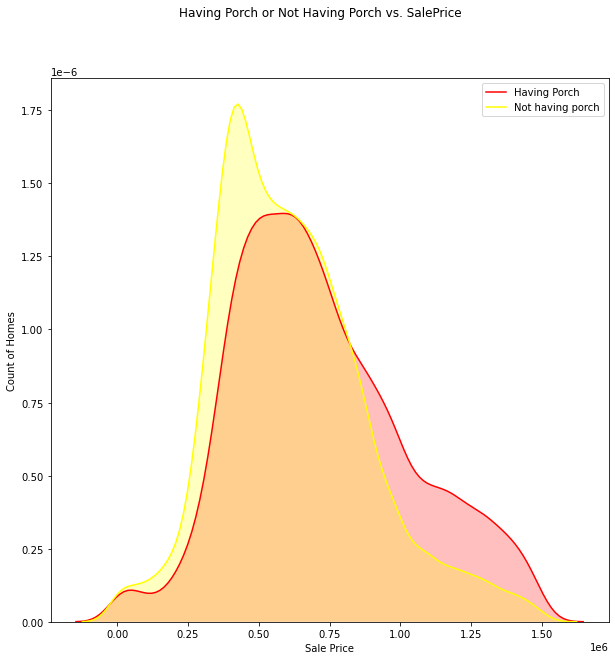

In [209]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.kdeplot(all_totliving_sqft[(all_totliving_sqft["Porch"]==1)&(all_totliving_sqft['SalePrice']<1500000)]["SalePrice"], shade=True, color="red", label="Having Porch", ax=ax)
sns.kdeplot(all_totliving_sqft[(all_totliving_sqft["Porch"]==0)&(all_totliving_sqft['SalePrice']<1500000)]["SalePrice"], shade=True, color="yellow", label="Not having porch", ax=ax)

ax.set_xlabel("Sale Price")
ax.set_ylabel("Count of Homes")

fig.suptitle("Having Porch or Not Having Porch vs. SalePrice");

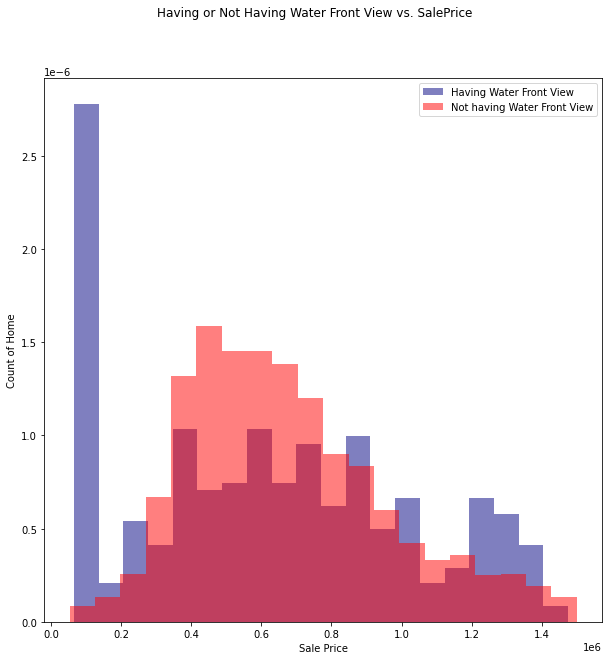

In [207]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.hist(all_totliving_sqft[(all_totliving_sqft["WaterFronVew"]==1)&(all_totliving_sqft['SalePrice']<1500000)&(all_totliving_sqft['SalePrice']>50000)]["SalePrice"], bins=20, alpha=0.5, color="navy", label="Having Water Front View", density=True)
ax.hist(all_totliving_sqft[(all_totliving_sqft["WaterFronVew"]==0)&(all_totliving_sqft['SalePrice']<1500000)&(all_totliving_sqft['SalePrice']>50000)]["SalePrice"], bins=20, alpha=0.5, color="r", label="Not having Water Front View", density=True)

ax.set_xlabel("Sale Price")
ax.set_ylabel("Count of Home")

fig.suptitle("Having or Not Having Water Front View vs. SalePrice")

ax.legend();

In [184]:
all_totliving_sqft['WaterFronVew'].value_counts()

0.0    28641
1.0      581
Name: WaterFronVew, dtype: int64

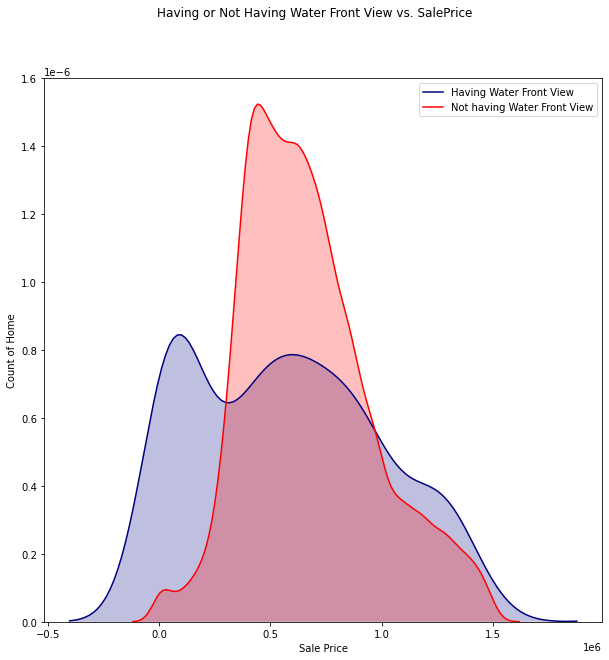

In [210]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.kdeplot(all_totliving_sqft[(all_totliving_sqft["WaterFronVew"]==1)&(all_totliving_sqft['SalePrice']<1500000)]["SalePrice"], shade=True, color="navy", label="Having Water Front View", ax=ax)
sns.kdeplot(all_totliving_sqft[(all_totliving_sqft["WaterFronVew"]==0)&(all_totliving_sqft['SalePrice']<1500000)]["SalePrice"], shade=True, color="r", label="Not having Water Front View", ax=ax)

ax.set_xlabel("Sale Price")
ax.set_ylabel("Count of Home")

fig.suptitle("Having or Not Having Water Front View vs. SalePrice");

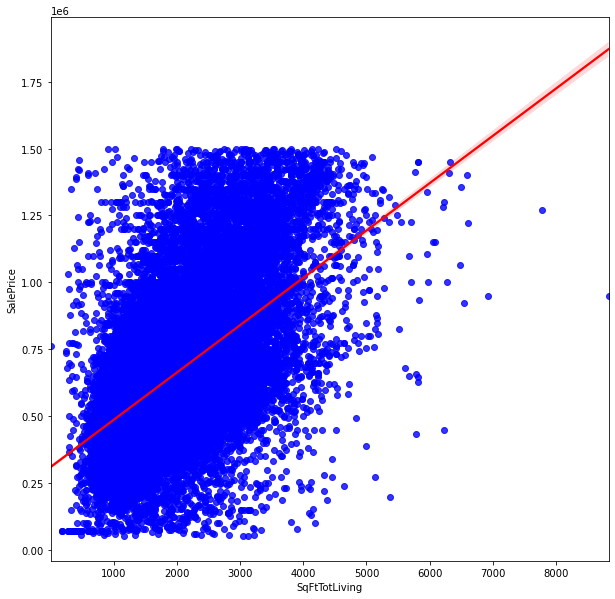

In [211]:
fig, ax = plt.subplots(figsize = (10, 10))
new_all_total = all_totliving_sqft[(all_totliving_sqft['SalePrice']<1500000)&(all_totliving_sqft['SalePrice']>50000)]
ax.set(xlabel="SqFtTotLiving", ylabel="SalePrice")
sns.regplot(x=(new_all_total["SqFtTotLiving"]), y=new_all_total["SalePrice"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show;

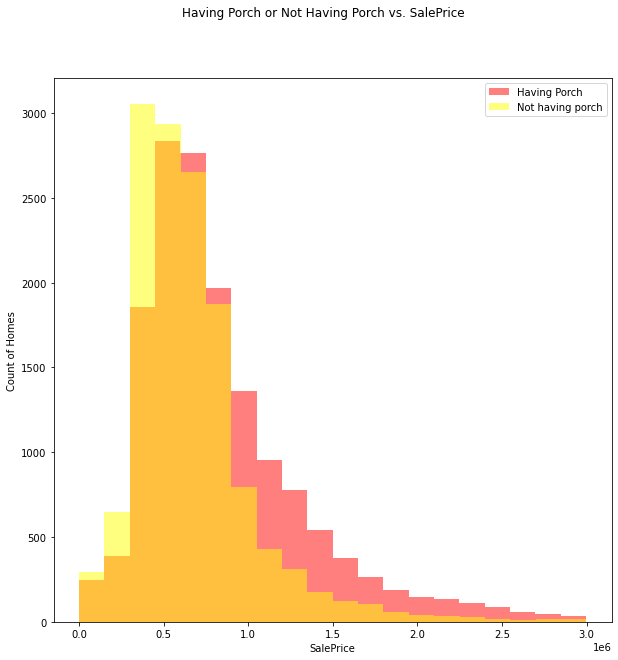

In [212]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.hist(all_totliving_sqft[(all_totliving_sqft["Porch"]==1)&(all_totliving_sqft['SalePrice']<3000000)]["SalePrice"], bins=20, alpha=0.5, color="red", label="Having Porch")
ax.hist(all_totliving_sqft[(all_totliving_sqft["Porch"]==0)&(all_totliving_sqft['SalePrice']<3000000)]["SalePrice"], bins=20, alpha=0.5, color="yellow", label="Not having porch")

ax.set_xlabel("SalePrice")
ax.set_ylabel("Count of Homes")

fig.suptitle("Having Porch or Not Having Porch vs. SalePrice")

ax.legend();